## Laboratorio 4 - detección de malware
María Inés Vásquez Figueroa - 18250 \
Paula Camila González Ortega - 18398

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

plt.rcParams["figure.figsize"] = (8, 5) # para poder desplegar todas la tablas y graficas

### Exploración de data

In [47]:
# leer el dataset del malware 
df = pd.read_csv("dataset.csv")
df.head()

,.text,.text_virtual_address,.text_virtual_size,.text_size_raw_data,.rdata,.rdata_virtual_address,.rdata_virtual_size,.rdata_size_raw_data,.data,.data_virtual_address,...,b'_aullshr',b'_allmul',b'_allshl',b'_alldiv',b'_chkstk',b'_aulldiv',b'RtlUnwind',b'listen',b'bind',b'accept'
0,1,4096,3382,3584,1,8192,1308,1536,1,12288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4096,3382,3584,1,8192,1308,1536,1,12288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,4096,9690,9728,1,16384,2596,3072,1,20480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4096,9690,9728,1,16384,2596,3072,1,20480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4096,3702,4096,1,8192,1662,2048,1,12288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 378 entries, .text to b'accept'
dtypes: float64(356), int64(22)
memory usage: 118.2 KB


In [6]:
# conteo de valores en columna "text_size_raw_data"
df['.text_size_raw_data'].value_counts()  

4096      15
9728       8
3584       6
10752      3
547328     3
572928     2
424960     1
436224     1
436736     1
Name: .text_size_raw_data, dtype: int64

In [7]:
# conteo de valores en columna "rdata_virtual_address"
df['.rdata_virtual_address'].value_counts()  

8192      21
16384     11
552960     3
442368     2
577536     2
430080     1
Name: .rdata_virtual_address, dtype: int64

In [8]:
# conteo de valores en columna "b'listen'"
df["b'listen'"].value_counts()

1.0    2
Name: b'listen', dtype: int64

In [9]:
# conteo de valores en columna "b'_chkstk'" 
df["b'_chkstk'"].value_counts()

1.0    5
Name: b'_chkstk', dtype: int64

In [10]:
# Sumar nulos
df["b'_chkstk'"].isna().sum()

35

### Preparacion de data

In [48]:
# df = df.dropna(axis=1, how="any", thresh=None, subset=None, inplace=False)
df.fillna(value = 0, inplace = True) # Todos los NaN se convierten a 0

In [49]:
for c in df.columns.values:
    #se recorre cada columan del dataframe
    df[c] = df[c].astype(int)
    if len(df[c].unique()) == 2:
        # si hay 2 valores unicos en una columna se cambia a variable categorica
        df[c] = df[c].astype('category')

In [42]:
df.dtypes

.text                       int32
.text_virtual_address       int32
.text_virtual_size          int32
.text_size_raw_data         int32
.rdata                      int32
                           ...   
b'_aulldiv'              category
b'RtlUnwind'             category
b'listen'                category
b'bind'                  category
b'accept'                category
Length: 378, dtype: object

In [21]:
df["b'bind'"].value_counts()

0    38
1     2
Name: b'bind', dtype: int64

In [50]:
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(df)
datos_escalados[:5]

array([[ 0.        ,  0.        , -0.50711796, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        , -0.50711796, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        , -0.47616602, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        , -0.47616602, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        , -0.50554779, ..., -0.22941573,
        -0.22941573, -0.22941573]])

### Iteraciones de K-Means

In [51]:
silh = []
kmax = 15

for k in range (2, kmax + 1):
  kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(X)
  etiquetas = kmeans.labels_
  silh.append(silhouette_score(datos_escalados, etiquetas, metric = 'euclidean'))

silh

[0.3885864050007561,
 0.675307226014217,
 0.802040914768342,
 0.8697623615154221,
 0.8516849547777475,
 0.770675661504654,
 0.8269255790787449,
 0.8418227494802085,
 0.8168228205176913,
 0.7515295472024717,
 0.8591896015701461,
 0.9221297915732372,
 0.873083459011427,
 0.8480919478665812]

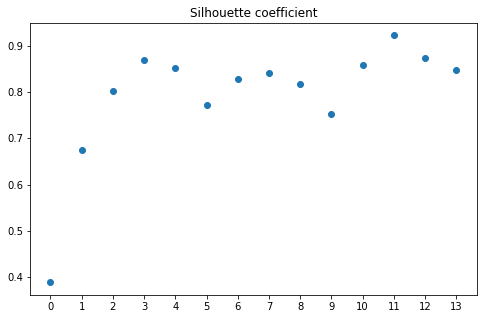

In [52]:
k = list(range(14))
plt.scatter(k, silh)
plt.title('Silhouette coefficient')
plt.xticks(k, k)
plt.show()
# Grafica de Silhouette coefficient

**¿Para qué número de clústeres se obtiene el coeficiente de sillhouete más alto?** \
Para 11 clústeres

In [53]:
# se ajustan los datos
kmeans.fit(datos_escalados)

KMeans(init='random', max_iter=200, n_clusters=15, n_init=1, random_state=123)

In [54]:
# El valor más bajo de SSE
kmeans

KMeans(init='random', max_iter=200, n_clusters=15, n_init=1, random_state=123)

In [55]:
#SSE
kmeans.inertia_

8.546002622354863e-08

In [56]:
#Posiciones finales de los centroides
kmeans.cluster_centers_

array([[ 0.        ,  0.        , -0.47781469, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        ,  1.61698595, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        ,  2.28669703, ...,  4.35889894,
         4.35889894,  4.35889894],
       ...,
       [ 0.        ,  0.        , -0.50531226, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        , -0.50554779, ..., -0.22941573,
        -0.22941573, -0.22941573],
       [ 0.        ,  0.        , -0.50543003, ..., -0.22941573,
        -0.22941573, -0.22941573]])

In [57]:
#Iteraciones para converger
kmeans.n_iter_

4

In [58]:
kmeans.labels_[:5]

array([ 7,  7,  8,  8, 14])

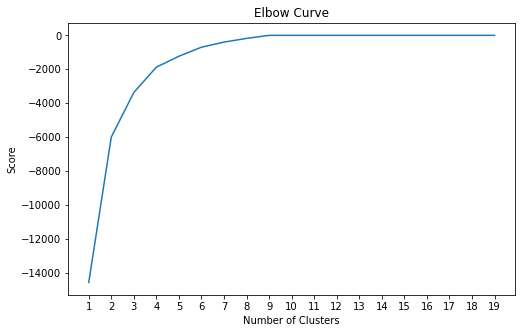

In [59]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(datos_escalados).score(datos_escalados) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(Nc, Nc)
plt.show()
# Grafica del codo para numero optimo de clusters

In [61]:
clusters = DBSCAN(eps = 0.005, min_samples = 2).fit(datos_escalados)
clusters.labels_

array([ 0,  0,  1,  1,  2, -1, -1,  3,  4,  5,  4,  6,  4,  1,  4,  1,  5,
        7,  4,  5,  0,  1,  8, -1,  5,  1,  6,  5,  5,  6,  8,  5,  3,  4,
        9,  2,  1,  9,  7,  9], dtype=int64)

**2. ¿Coincide el mayor de la pregunta 1 con el método del codo?**\
No es exactamente el mimso valor, pero si es cercano ya que según codo el número de clusters recomendado es aproximadamente 10... muy similar a 11\

**3. ¿Cuántas familias existen entre los ejemplares de malware proporcionados?**\
Según el output anterior se encontraron 10 familias de malware